<a href="https://colab.research.google.com/github/apoorvkh/notebooks/blob/main/Single-view%203D%20Reconstruction%20(UMR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [ ]:
!git clone https://github.com/NVlabs/UMR
%cd UMR
!pip install -r requirements.txt
!pip install Pillow==6.1 --upgrade
!bash install.sh

# Download Pre-trained Model

In [2]:
import requests

def download(file_id, dst_path):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params = { 'id' : file_id }, stream = True)
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            params = { 'id' : file_id, 'confirm' : value }
            response = session.get(URL, params = params, stream = True)
            break
    with open(dst_path, "wb") as f:
        for chunk in response.iter_content(32768):
            if chunk:
                f.write(chunk)

download('1lwZu6Rl8iL9KZBLvK4dIneB_dKMtC9uY', 'cachedir.tar.gz')
!tar xzf cachedir.tar.gz && rm cachedir.tar.gz

# Inference

In [19]:
%cd /content
from IPython.display import Image

/content


Loaded model from UMR/cachedir/snapshots/cub_net/pred_net_latest.pth.
Read image from UMR/demo_imgs/img1.jpg.
THCudaCheck FAIL file=/pytorch/aten/src/THC/THCGeneral.cpp line=383 error=11 : invalid argument
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
Results saved at outputs.


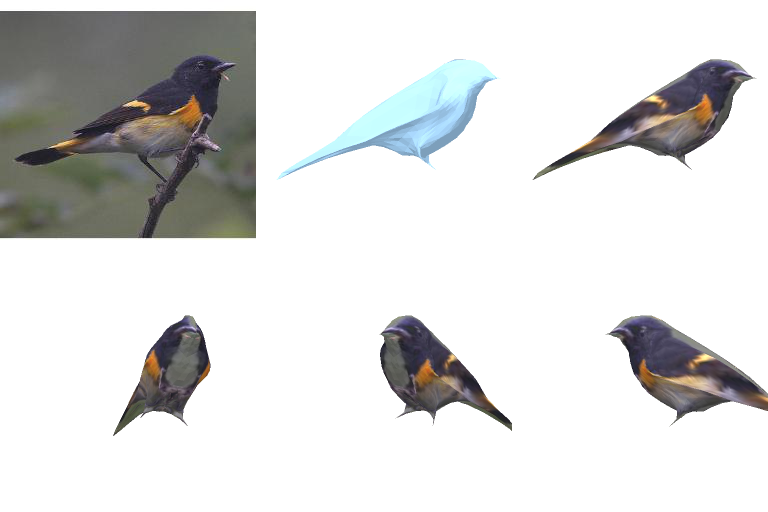

In [20]:
!python -m UMR.experiments.demo --model_path UMR/cachedir/snapshots/cub_net/pred_net_latest.pth --img_path UMR/demo_imgs/img1.jpg --out_path outputs
Image("outputs/pred_tex.png")